# Project 3, Part 1
By - Raghav Gupta

In [99]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import *
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import math as math

data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Exercise 1

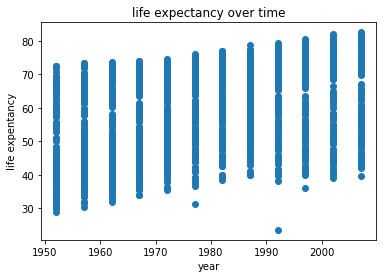

In [100]:
play_data = data[['year', 'lifeExp']].sort_values(by=['year'])

year = play_data['year'].values
lifexp = play_data ['lifeExp'].values

plt.plot(year, lifexp,'o')
plt.title("life expectancy over time")

plt.xlabel("year")
plt.ylabel("life expentancy")

plt.show()

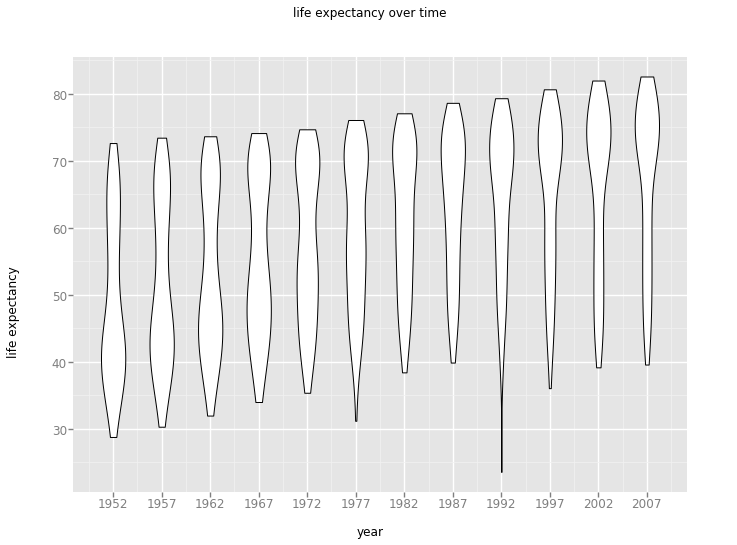

<ggplot: (305872613)>

In [101]:
ggplot(aes(x='year', y='lifeExp'), data=data) + geom_violin() + labs(title="life expectancy over time", x = "year", y = "life expectancy")

### Question 1 
As we can see from the scatter plot, there is a general trend for life expectency, it has been increasing over time. We can see that in the 1950s, the expectency was anywhere from 30-75 and in 2007, it is from 39 to 80. Also in the violin graph, the trend has shifted from bottom heavy to top heavy which reassures the same.

### Question 2
According to the violin graph, from 1952 - 1962, the life expectancy is low as they are bottom heavy, whereas after that it is top heavy which is a clear indication that life expectancy hase increased. 

From 1952 to 1977, the graph is unimodal and the rest appear to be bimodal. Years 1977, 1992 and 1997 are skew since they have a pointy tail. And lastly, the distribution for all years show us that they are not symmetric near the center of each violin plot.

### Question3

From the violoin plot above, we can observe and confidently comment that there is a strong relationship between the year and life expectancy of a country. But, the plot was not enough to tell us if we "fail to reject" the null hypothesis, hence, we will reject it. 


### Question 4

The graph should be linear as we just saw there was a direct correlation between year and life expentancy.

### Question 5

Even the violin plots should show the linear relation along with being centered at zero.

## Exercise 2

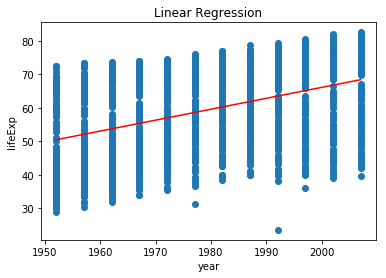

In [102]:
npm = np.matrix(play_data)
X = npm[:,0] 
Y = npm[:,1]
model = LinearRegression().fit(X,Y) 
m = model.coef_[0]
c = model.intercept_
x_1 = np.linspace(year.max(), year.min())
y_1 = (x_1*m)+c

plt.plot(year,lifexp,'o')
plt.plot(x_1,y_1,'r')
plt.title('Linear Regression')
plt.xlabel("year")
plt.ylabel("lifeExp")
plt.show()

In [103]:
result = sm.ols(formula="lifeExp ~ year", data=play_data).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           7.55e-80
Time:                        19:14:12   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

### Question 6

On average, the life expectancy increases by 0.32590383 years every year across the world.

### Question 7
We reject the null hypothesis since the p-value is 7.55e-80 which is very small 

## Exercise 3

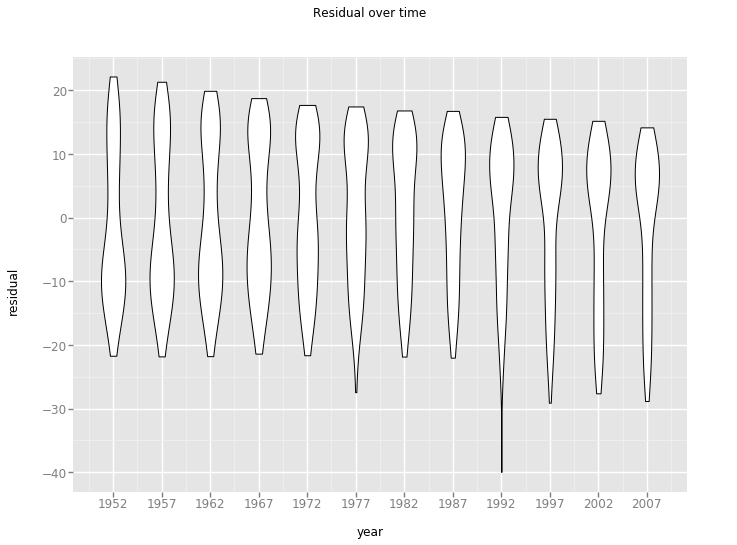

<ggplot: (297385237)>

In [104]:
residual_data = play_data.copy()
residual_data['residual'] =  residual_data['lifeExp'] - (residual_data['year']*m+c)
residual = residual_data.drop(['lifeExp'], 1)

ggplot(aes(x='year', y='residual'), data = residual) + geom_violin() + labs(title="Residual over time",
         x = "year",
         y = "residual")

### Question 8
Yes, the plot matches my expectation as it is linear.

## Exercise 4

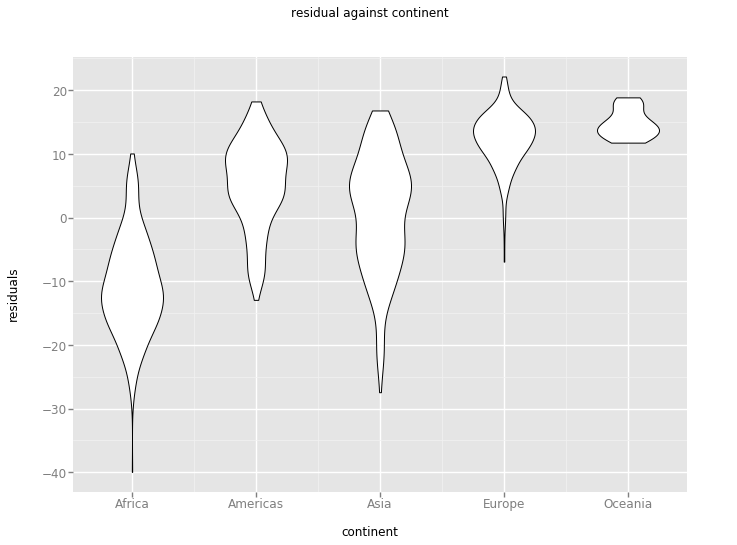

<ggplot: (306097297)>

In [105]:
continent_data = data[['year', 'lifeExp', 'continent']].copy()
continent_data['residual'] =  continent_data['lifeExp'] - (continent_data['year']*m+c)
clean = continent_data.drop(['lifeExp', 'year'], 1)

ggplot(aes(x='continent', y='residual'), data = clean) + geom_violin() + labs(title="residual against continent",
         x = "continent",
         y = "residuals")

### Question 9 

From the plot we can see that there is no dependence between the residual and the continent as there is no trend in residuals as a fucntion of continent. 

## Exercise 5 

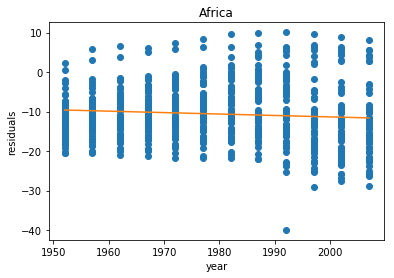

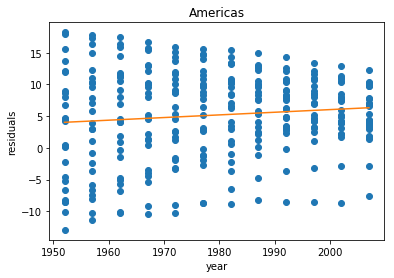

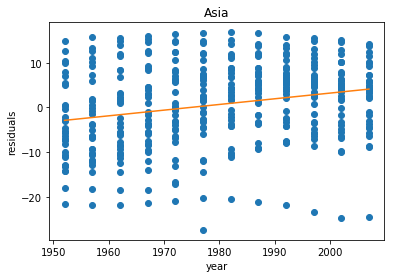

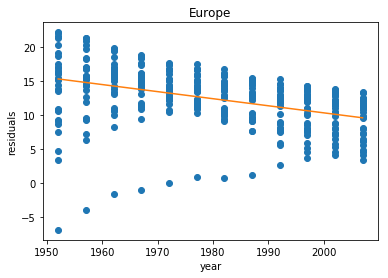

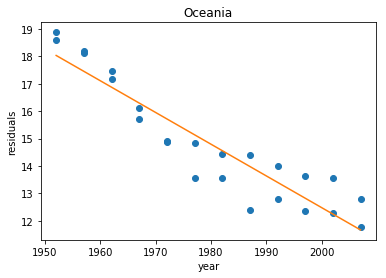

In [106]:
val=['Africa','Americas','Asia','Europe','Oceania']
clean_cont = continent_data.drop(['lifeExp'], 1)

for v in val:
    continent_tab = clean_cont.groupby(['continent']).get_group(v)
    year_plot = continent_tab['year'].values
    residual_plot = continent_tab['residual'].values
    
    z = np.polyfit(x = year_plot,y = residual_plot,deg = 1)
    f = np.poly1d(z)
    
    x_n = np.linspace(year_plot.min(), year_plot.max(), 100)
    y_n = f(x_n)
    
    plt.plot(year_plot, residual_plot,'o',x_n,y_n)
    
    plt.xlabel("year")
    plt.ylabel("residuals")
    plt.title(v)
    plt.show()

### Question 10
There should be an interaction term for continent and year because the coefficient for each continent is not same. As we can see, the graph for Asia and Americas has an increasing line whereas the others don't. Also, the slope for each plot different from one another. Oceania and Europe, both have a decreasing line but one is steeper than the other. 

## Exercise 6

In [107]:
w = sm.ols(formula="lifeExp ~ continent*year", data=continent_data).fit()
print (w.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 20 Nov 2017   Prob (F-statistic):               0.00
Time:                        19:14:14   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11
All parameters in the model are not significantly different from zero. To be significantly different from zero, the p value must be less than 0.05. Here, Oceania both with and without the interaction, is bigger than 0.05. 

### Question 12
Below is thelife expectancy increase each year for each continent. Asia has the biggest life expectancy increase with 0.453 and the Oceania is last with .0210. 

In [108]:
t = str(w.params + w.params.year)
print(t[245:])


continent[T.Americas]:year      0.367651
continent[T.Asia]:year          0.453122
continent[T.Europe]:year        0.221932
continent[T.Oceania]:year       0.210272
dtype: float64


## Exercise 7

In [109]:
print"The linear regression models from Exercise 2 (only including year as a covariate)"
print"F stat: ",result.fvalue
print"R-squared: ", result.rsquared
print"F stat(p_value): ", result.f_pvalue
print("\n")
print"The linear regression models from Exercise 6 (including interaction between year and continent)"
print"F stat: ", w.fvalue
print"R-squared: ", w.rsquared
print"F stat(p_value): ", w.f_pvalue

The linear regression models from Exercise 2 (only including year as a covariate)
F stat:  398.604745712
R-squared:  0.189757138522
F stat(p_value):  7.5467946256e-80


The linear regression models from Exercise 6 (including interaction between year and continent)
F stat:  424.27290234
R-squared:  0.69269596659
F stat(p_value):  0.0


### Question 13
Yes, the interaction model (Exercise 6) is much better than the year-only model (Exercise 2) because in comparison with two OLS regression results, the interaction model has a higher F-statistic, R-squared but a lower probabilty of F-statistic value.

The reason why the interaction model is better is because these continents are different from each other in terms of sizes, Asia is bigger than the rest of them. Industrialization and improvement in the quality of life is different as well. All these things happen at a different rate and so ignoring these facts would have many outliers not being counted in the regression. 


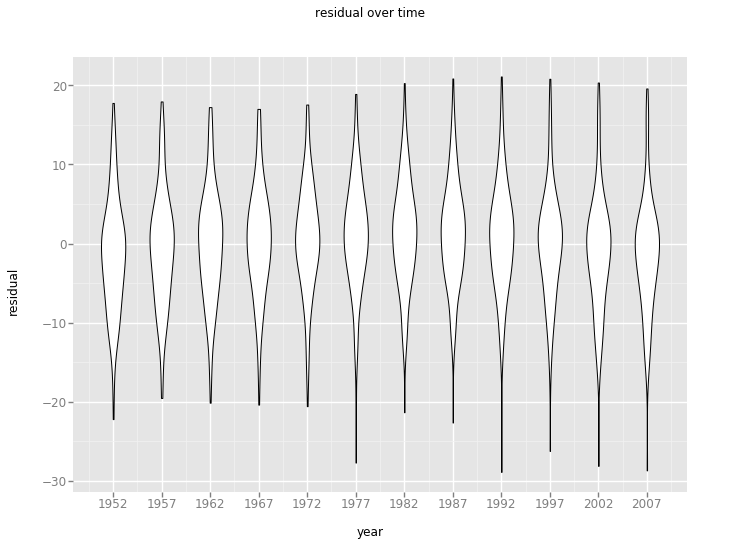

<ggplot: (307512969)>

In [110]:
OLS_yr = pd.DataFrame({'year': residual_cont["year"].values, 'residual': residual_cont["lifeExp"].values-w.fittedvalues})

ggplot(aes(x='year', y='residual'), data = OLS_yr) + geom_violin() + labs(title="residual over time",
         x = "year",
         y = "residual")

# Project 3, Part 2
By - Raghav Gupta, Romil Jangalwa

## Problem 1

In [111]:
def funct(x, y, P):
    return y - (math.exp(np.dot(P, x)))/(1+math.exp(np.dot(P, x)))

def grad_descent(X, Y, A, K, N):
    P = np.zeroes(D)
    loss = np.zeroes(K)
    
    for val in range(K):
        # make predictions 
        prediction = X.dot(P)
        
        #compute loss by taking partial derivative of the loss function 
        for val2 in range(N):
            loss[val] += funct(Y[val2], prediction)
        #update theta 
        P = P - A * gradient
        
    return P, loss

## Problem 2

The gradient descent update equation for logistic regression is given by :  $  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $

Logistic function: 
$P(Y=0 | X)= \frac {1}{(1+exp(w_0+\sum_{i=1}^{n} (w_iX_i)))} $


$P(Y=1 | X)= \frac{exp(w_0+\sum_{i=1}^{n} (w_iX_i))}{(1+exp(w_0+\sum_{i=1}^{n} (w_iX_i)))} $

Likelihood for the data conditional is:
$\prod_{l}P(Y^l|W,X^l)$

and the liklihood for log is:
$l(W)= ln(\prod_{l}P(Y^l|W,X^l))=\sum_{l}Y^l(w_0+\sum_{i}{n})-ln(1+exp(w_0+\sum_{i}^{n}w_iX_i^l)) $

so, the maximizing conditioanl log likelihood:
$\frac{\partial l(W)}{\partial w_i}=\sum_{l}X_i^l(Y^l-\hat{P}(Y^l=1|X^l,W)) $

which results in:
$w_{i+1}=w_i+\alpha \sum_{l}X_i^l(Y^l-\hat{P}(Y^l=1|X^l,W)), $ where

$w_i=\beta^k; 
l=[1,n]; 
Y^l=y_i; 
\hat{P}(Y^l=1|X^l,W)=p_i(\beta^k); 
X_i^l=\mathbf{x_i}$

Hence:
$  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $

NOTE: I took a bit of help from online resources and wolfram alpha since the math was complicated.

## Problem 3

In [112]:
def gradient_descent(X, Y, A, K, N):
    P = np.zeros(len(X[0]))
    loss = np.zeros(N)
    grad = 0
    
    for k in range(K):
        #compute loss by taking partial derivative of the loss function
        for i in range(N):
            loss[i] = funct(X[i], Y[i], P)
            grad = loss[i] * X[i]

        #update theta
        P = P + A * grad
        P = P/np.linalg.norm(P)
    return P, loss

## Problem 4

loss:
[ 0.63791952  0.53287997  0.64608587 -0.7337037   0.54937409  0.28588442
  0.20953786 -0.25081876 -0.49559084 -0.05952649  0.28628818  0.14974103
 -0.46771903 -0.40519237  0.47310198 -0.42604687  0.4021725   0.78138408
 -0.84295235  0.62842447  0.47545376 -0.52067514 -0.54322908 -0.6294663
 -0.59135603 -0.26777961  0.44213414 -0.36752064 -0.23255914  0.4300699
  0.4996668   0.06482589 -0.48786442  0.21531929  0.60071387  0.06681171
 -0.31843762  0.58378021  0.48770791 -0.27734215 -0.51219833  0.5002424
  0.62043824  0.31411267 -0.60967823  0.16543907 -0.47271886  0.66595019
  0.56552841 -0.52615359 -0.09842955  0.39319349  0.27815834 -0.49421861
 -0.69964549  0.68522475  0.06995376 -0.74018813  0.31107266  0.92292706
 -0.29822881 -0.26984573 -0.10807856  0.62504383  0.14561822 -0.80291083
  0.43421737  0.40170527 -0.24271721  0.12498228  0.59680827  0.4362643
 -0.8048033  -0.20466416  0.46991665  0.22822816 -0.64856599  0.83007821
  0.52408392 -0.83615763  0.37901105  0.35833404 

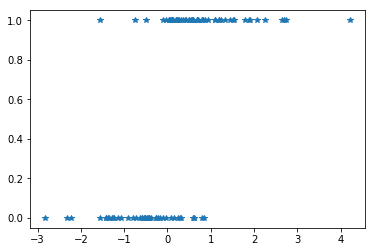

In [113]:
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]


(P, loss) = gradient_descent(log_gen_data_x, log_gen_data_y, 500, 500, len(log_gen_data_y))
est = np.zeros(len(log_gen_data_y))
for i in range(len(log_gen_data_x[0])):
    est += log_gen_data_x[:, i] * P[i]
est = est + loss

print "loss:"
print(loss)
print "\n"
print "estimated:"
print(est)
print "\n"
print "test results:"
print(log_gen_data_y)
plt.plot(est, log_gen_data_y, '*')
plt.show()